In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pickle

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder,Normalizer,MinMaxScaler
from sklearn.model_selection import train_test_split


#warnings.filterwarnings("ignore")
%matplotlib inline
%matplotlib notebook

In [2]:
df=pd.read_csv("first inten project.csv")

<div style= "padding: 30px ;
             color :powderblue ;
             margin : 10px ; 
             font-family: verdana; 
             font-size: 200%; 
             display:fill; 
             border: 4px solid powderblue; 
             overflow:hidden; 
             font-weight:400; 
             background-color:black ; 
             text-align:center;">
    <b>EDA</b>

</div>

In [3]:
df.head(5)

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled


In [4]:
df.shape

(36285, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  object 
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  object 
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average price             36285 non-null  float64
 14  specia

In [6]:
df.isnull().sum()

Booking_ID                  0
number of adults            0
number of children          0
number of weekend nights    0
number of week nights       0
type of meal                0
car parking space           0
room type                   0
lead time                   0
market segment type         0
repeated                    0
P-C                         0
P-not-C                     0
average price               0
special requests            0
date of reservation         0
booking status              0
dtype: int64

In [7]:
df.describe()

,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,repeated,P-C,P-not-C,average price,special requests
count,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000
mean,1.844839,0.105360,0.810693,2.204602,0.030977,85.239851,0.025630,0.023343,0.153369,103.421636,0.619733
std,0.518813,0.402704,0.870590,1.410946,0.173258,85.938796,0.158032,0.368281,1.753931,35.086469,0.786262
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [8]:
df.columns

Index(['Booking_ID', 'number of adults', 'number of children',
       'number of weekend nights', 'number of week nights', 'type of meal',
       'car parking space', 'room type', 'lead time', 'market segment type',
       'repeated', 'P-C', 'P-not-C', 'average price ', 'special requests',
       'date of reservation', 'booking status'],
      dtype='object')

In [9]:
df.drop(["Booking_ID"],axis=1,inplace=True)

In [10]:
df.rename(columns={"P-C":"previously reservation canceled","P-not-C":"previously reservation not canceled"},inplace=True)

In [11]:
df["date of reservation"]=df["date of reservation"].replace({"2018-2-29":"2018-2-28"})

In [12]:
df["date of reservation"]=pd.to_datetime(df["date of reservation"])

In [13]:
df["day"]=df["date of reservation"].dt.day
df["month"]=df["date of reservation"].dt.month
df["year"]=df["date of reservation"].dt.year

In [14]:
df.tail()

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,previously reservation canceled,previously reservation not canceled,average price,special requests,date of reservation,booking status,day,month,year
36280,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,Online,0,0,0,115.00,1,2018-09-13,Canceled,13,9,2018
36281,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,Online,0,0,0,107.55,1,2017-10-15,Not_Canceled,15,10,2017
36282,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,Online,0,0,0,105.61,1,2018-12-26,Not_Canceled,26,12,2018
36283,3,0,0,4,Meal Plan 1,0,Room_Type 1,121,Offline,0,0,0,96.90,1,2018-07-06,Not_Canceled,6,7,2018
36284,2,0,0,5,Meal Plan 1,0,Room_Type 4,44,Online,0,0,0,133.44,3,2018-10-18,Not_Canceled,18,10,2018


In [15]:
df.drop(columns=["date of reservation"],inplace=True)

In [16]:
df["year"].value_counts()

2018    29767
2017     6516
2015        1
2016        1
Name: year, dtype: int64

In [17]:
df["month"].value_counts()[:5]

10    5320
9     4612
8     3813
6     3203
12    3022
Name: month, dtype: int64

In [18]:
df["type of meal"] = LabelEncoder().fit_transform(df["type of meal"])
df["room type"] = LabelEncoder().fit_transform(df["room type"])
df["market segment type"] = LabelEncoder().fit_transform(df["market segment type"])

In [19]:
df.head(10)

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,previously reservation canceled,previously reservation not canceled,average price,special requests,booking status,day,month,year
0,1,1,2,5,0,0,0,224,3,0,0,0,88.00,0,Not_Canceled,2,10,2015
1,1,0,1,3,3,0,0,5,4,0,0,0,106.68,1,Not_Canceled,6,11,2018
2,2,1,1,3,0,0,0,1,4,0,0,0,50.00,0,Canceled,28,2,2018
3,1,0,0,2,0,0,0,211,4,0,0,0,100.00,1,Canceled,20,5,2017
4,1,0,1,2,3,0,0,48,4,0,0,0,77.00,0,Canceled,11,4,2018
5,1,0,0,2,1,0,0,346,3,0,0,0,100.00,1,Canceled,13,9,2016
6,1,1,1,4,0,0,0,34,4,0,0,0,107.55,1,Not_Canceled,15,10,2017
7,3,0,1,3,0,0,3,83,4,0,0,0,105.61,1,Not_Canceled,26,12,2018
8,1,1,0,4,0,0,0,121,3,0,0,0,96.90,1,Not_Canceled,6,7,2018
9,2,0,0,5,0,0,3,44,4,0,0,0,133.44,3,Not_Canceled,18,10,2018


<div style= "padding: 30px ;
             color :powderblue ;
             margin : 10px ; 
             font-family: verdana; 
             font-size: 200%; 
             display:fill; 
             border: 4px solid powderblue; 
             overflow:hidden; 
             font-weight:400; 
             background-color:black ; 
             text-align:center;">
    <b>visualization and ploting</b>

</div>

<IPython.core.display.Javascript object>


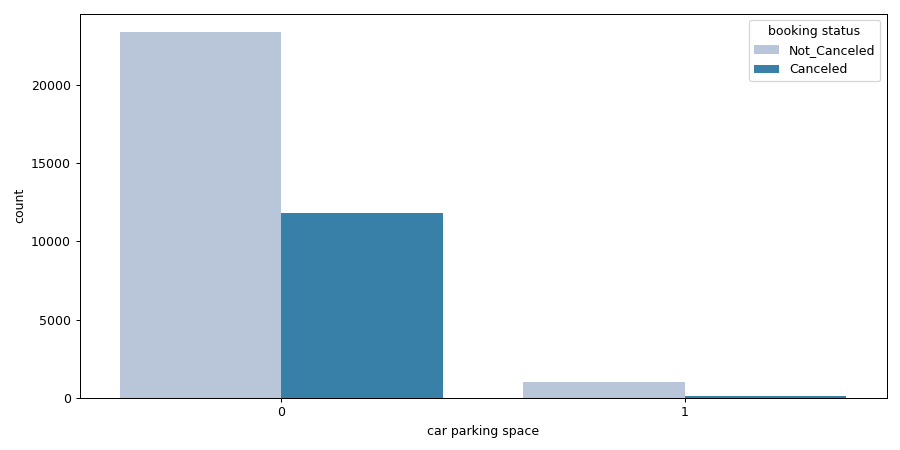

In [20]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x="car parking space",hue="booking status",palette="PuBu")
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


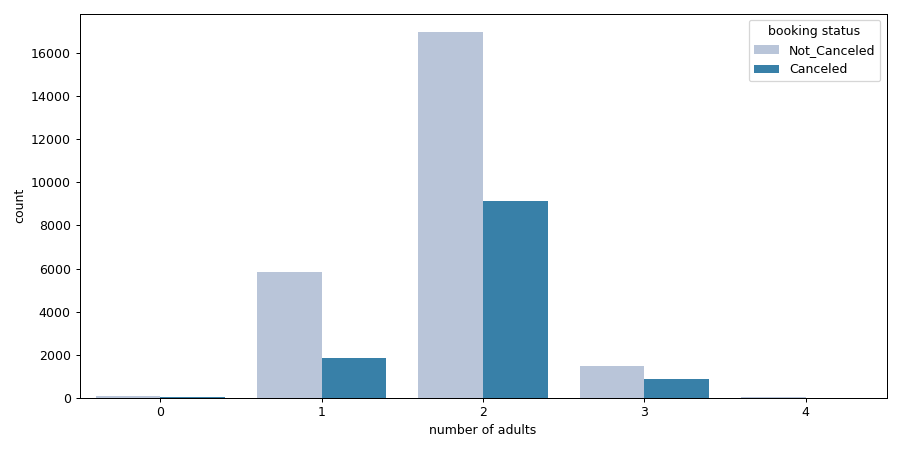

In [21]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x="number of adults",hue="booking status",palette="PuBu")
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


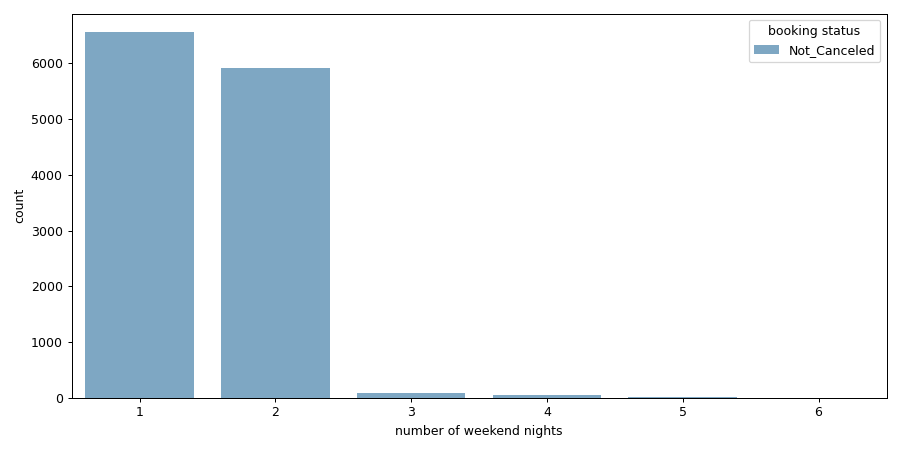

In [22]:
plt.figure(figsize=(10,5))
weekend_df=df[(df["number of weekend nights"]>0)&(df["booking status"]=="Not_Canceled")]
sns.countplot(data=weekend_df,x="number of weekend nights",hue="booking status",palette="PuBu")
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


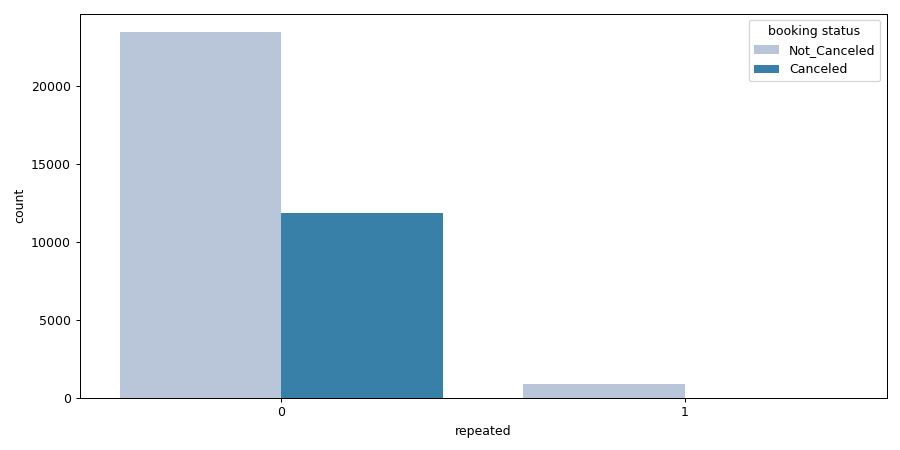

In [23]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x="repeated",hue="booking status",palette="PuBu")
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


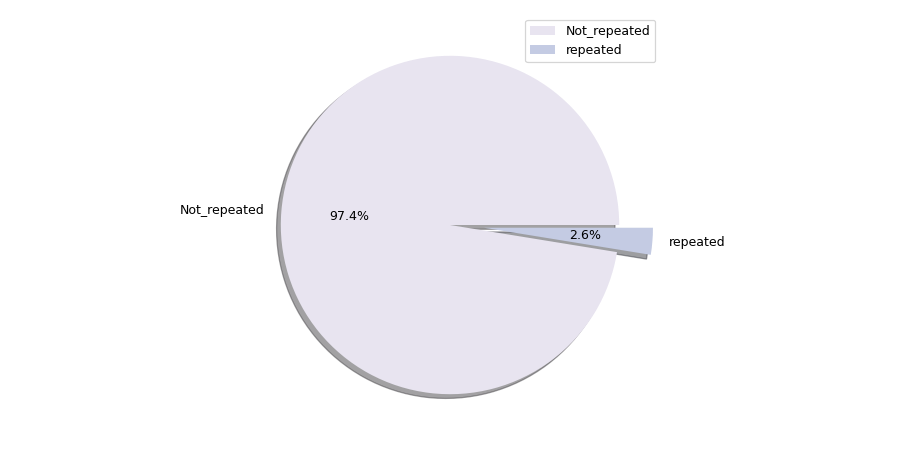

In [24]:
plt.figure(figsize=(10,5))
plt.pie(df["repeated"].value_counts(),labels=["Not_repeated","repeated"],autopct="%0.1f%%",explode=[0,0.2],shadow=True,colors=sns.color_palette("PuBu"))
plt.legend()
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


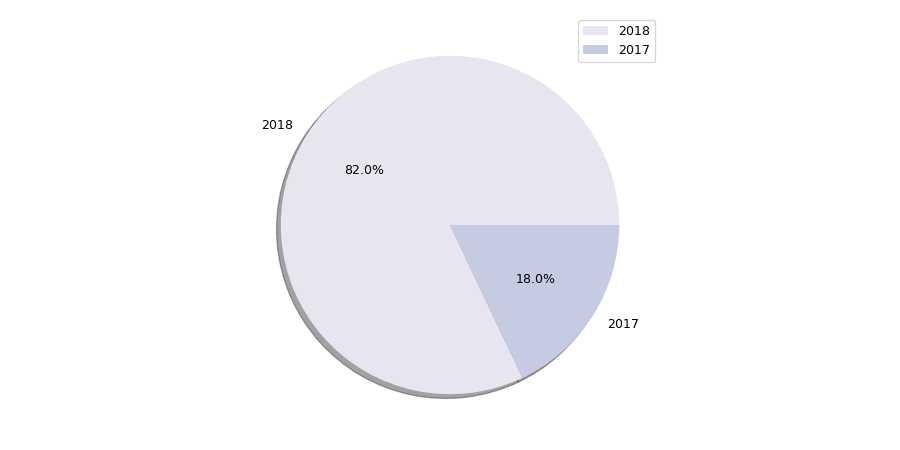

In [25]:
df["month"].value_counts()[:5]
plt.figure(figsize=(10,5))
plt.pie(df["year"].value_counts()[:2],labels=df["year"].value_counts()[:2].index,autopct="%0.1f%%",shadow=True,colors=sns.color_palette("PuBu"))
plt.legend()
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


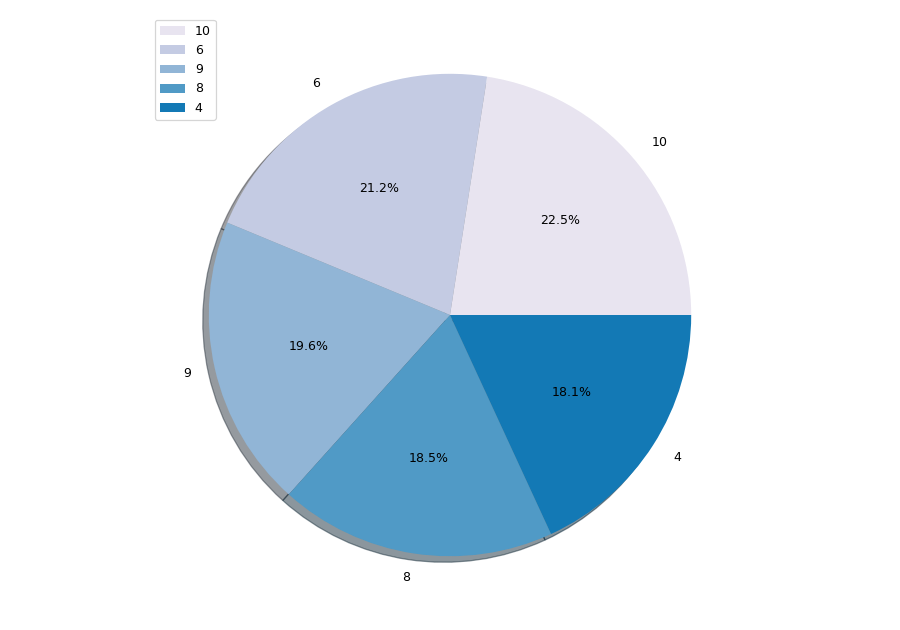

In [26]:
df["month"].value_counts()[:5]
plt.figure(figsize=(10,7))
max_year=df[df["year"]==2018]
plt.pie(max_year["month"].value_counts()[:5],labels=max_year["month"].value_counts()[:5].index,autopct="%0.1f%%",shadow=True,colors=sns.color_palette("PuBu"))
plt.legend()
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


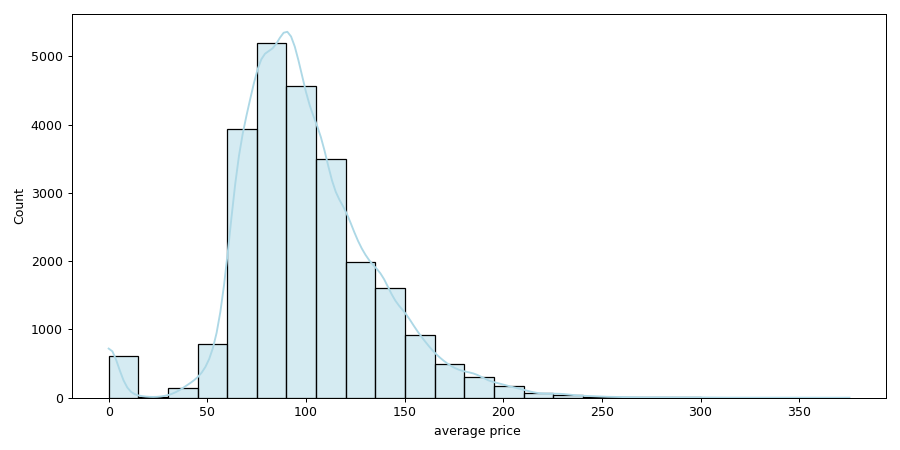

In [27]:
fig,ax=plt.subplots(figsize=(10,5))
sns.histplot(df["average price "][df["booking status"]=="Not_Canceled"],bins=25,kde=True,color="lightblue",ax=ax)
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


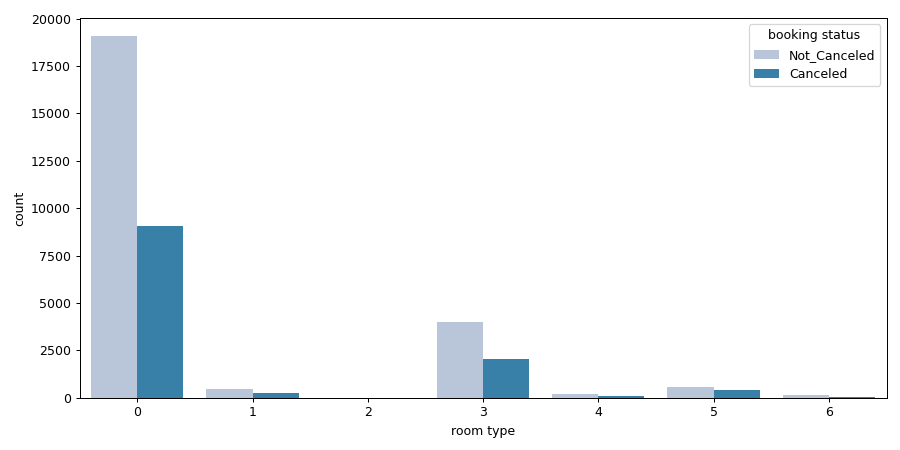

In [28]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x="room type",hue="booking status",palette="PuBu")
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


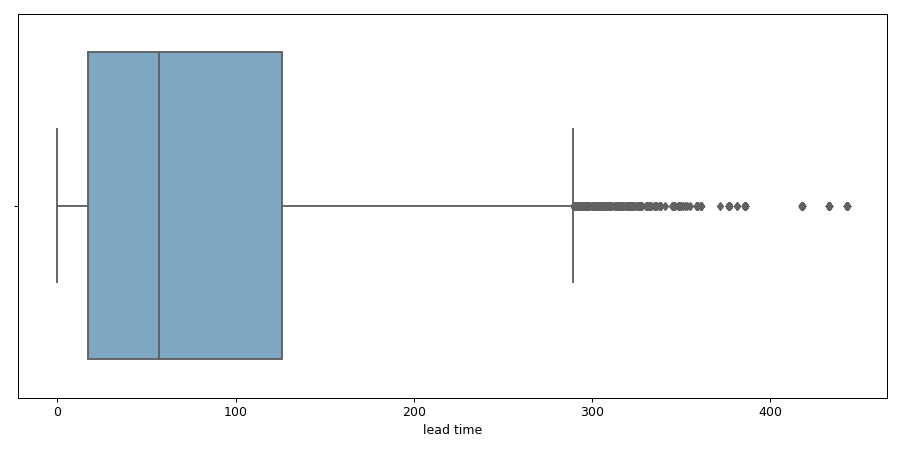

In [29]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df,x="lead time",palette="PuBu")
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


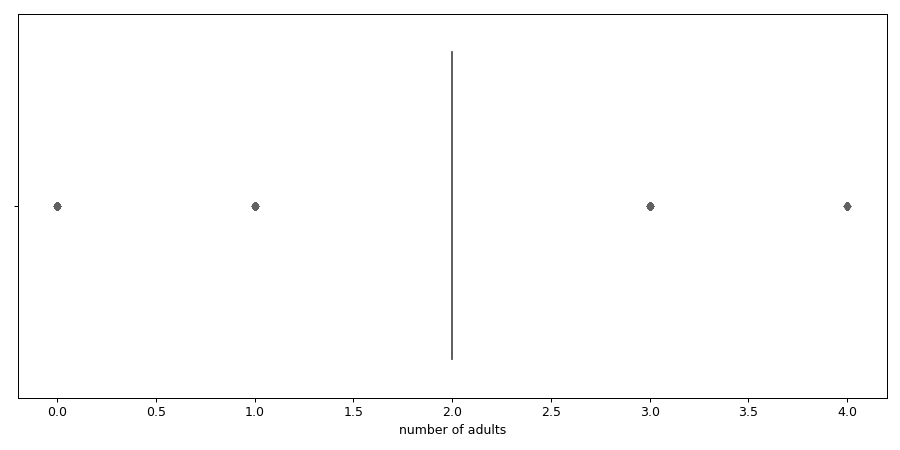

In [30]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df,x="number of adults",palette="PuBu")
plt.tight_layout()
plt.show()

In [31]:
print(df["number of adults"].value_counts())
print("//////////////////////////////////////////")
print(df["number of children"].value_counts())

2    26110
1     7702
3     2318
0      139
4       16
Name: number of adults, dtype: int64
//////////////////////////////////////////
0     33583
1      1622
2      1058
3        19
9         2
10        1
Name: number of children, dtype: int64


<IPython.core.display.Javascript object>


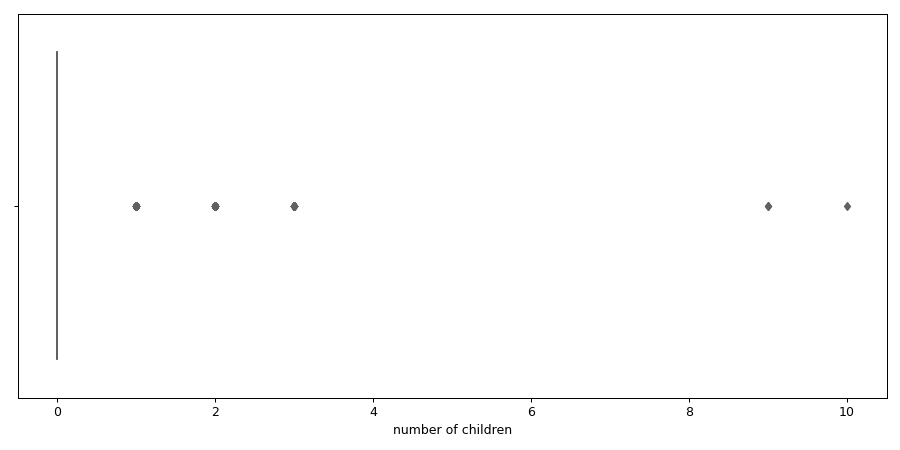

In [32]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df,x="number of children",palette="PuBu")
plt.tight_layout()
plt.show()

In [33]:
def remove_outliers(df, column, threshold=3):
    
    z_scores = np.abs((df[column] - df[column].mean()) / df[column].std())
    
    outliers=df[z_scores > threshold]
    
    df = df[z_scores < threshold]

    return df

In [34]:

df = remove_outliers(df,"number of adults", threshold=3)

df = remove_outliers(df,"number of children", threshold=5)


In [35]:
df

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,previously reservation canceled,previously reservation not canceled,average price,special requests,booking status,day,month,year
0,1,1,2,5,0,0,0,224,3,0,0,0,88.00,0,Not_Canceled,2,10,2015
1,1,0,1,3,3,0,0,5,4,0,0,0,106.68,1,Not_Canceled,6,11,2018
2,2,1,1,3,0,0,0,1,4,0,0,0,50.00,0,Canceled,28,2,2018
3,1,0,0,2,0,0,0,211,4,0,0,0,100.00,1,Canceled,20,5,2017
4,1,0,1,2,3,0,0,48,4,0,0,0,77.00,0,Canceled,11,4,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36280,2,0,0,2,1,0,0,346,4,0,0,0,115.00,1,Canceled,13,9,2018
36281,2,0,1,3,0,0,0,34,4,0,0,0,107.55,1,Not_Canceled,15,10,2017
36282,2,0,1,3,0,0,3,83,4,0,0,0,105.61,1,Not_Canceled,26,12,2018
36283,3,0,0,4,0,0,0,121,3,0,0,0,96.90,1,Not_Canceled,6,7,2018


<div style= "padding: 30px ;
             color :powderblue ;
             margin : 10px ; 
             font-family: verdana; 
             font-size: 200%; 
             display:fill; 
             border: 4px solid powderblue; 
             overflow:hidden; 
             font-weight:400; 
             background-color:black ; 
             text-align:center;">
    <b>data spliting and model trainning</b>

</div>

In [36]:
df.head()

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,previously reservation canceled,previously reservation not canceled,average price,special requests,booking status,day,month,year
0,1,1,2,5,0,0,0,224,3,0,0,0,88.00,0,Not_Canceled,2,10,2015
1,1,0,1,3,3,0,0,5,4,0,0,0,106.68,1,Not_Canceled,6,11,2018
2,2,1,1,3,0,0,0,1,4,0,0,0,50.00,0,Canceled,28,2,2018
3,1,0,0,2,0,0,0,211,4,0,0,0,100.00,1,Canceled,20,5,2017
4,1,0,1,2,3,0,0,48,4,0,0,0,77.00,0,Canceled,11,4,2018


In [37]:
df.columns

Index(['number of adults', 'number of children', 'number of weekend nights',
       'number of week nights', 'type of meal', 'car parking space',
       'room type', 'lead time', 'market segment type', 'repeated',
       'previously reservation canceled',
       'previously reservation not canceled', 'average price ',
       'special requests', 'booking status', 'day', 'month', 'year'],
      dtype='object')

### normalizing the data

In [38]:
#normalizer = Normalizer(norm='l2')
scaler = MinMaxScaler()

df['lead time'] = scaler.fit_transform(df[['lead time']].values)
df['average price '] = scaler.fit_transform(df[['average price ']].values)
df["year"] = scaler.fit_transform(df[["year"]].values)
df["day"] = scaler.fit_transform(df[["day"]].values)
df["month"] = scaler.fit_transform(df[["month"]].values)


In [39]:
x=df.drop("booking status",axis=1)
y=df["booking status"]

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

<div style= "padding: 30px ;
             color :powderblue ;
             margin : 10px ; 
             font-family: verdana; 
             font-size: 200%; 
             display:fill; 
             border: 4px solid powderblue; 
             overflow:hidden; 
             font-weight:400; 
             background-color:black ; 
             text-align:center;">
    <b>Logistic Regression</b>

</div>

In [41]:
model = LogisticRegression(max_iter=10000)

In [42]:
model.fit(x_train, y_train)

LogisticRegression(max_iter=10000)

In [43]:
prediction = model.predict(x_test)

In [44]:
print(model.score(x_test,y_test))
print(model.score(x_train,y_train))

0.8078360791914717
0.8041536863966771


In [45]:
accuracy = accuracy_score(y_test, prediction)
print("Accuracy Score:", accuracy)

Accuracy Score: 0.8078360791914717


In [46]:
conf_matrix = confusion_matrix(y_test, prediction)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[1445  903]
 [ 485 4390]]


In [47]:
class_report = classification_report(y_test, prediction)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

    Canceled       0.75      0.62      0.68      2348
Not_Canceled       0.83      0.90      0.86      4875

    accuracy                           0.81      7223
   macro avg       0.79      0.76      0.77      7223
weighted avg       0.80      0.81      0.80      7223



<div style= "padding: 30px ;
             color :powderblue ;
             margin : 10px ; 
             font-family: verdana; 
             font-size: 200%; 
             display:fill; 
             border: 4px solid powderblue; 
             overflow:hidden; 
             font-weight:400; 
             background-color:black ; 
             text-align:center;">
    <b>KNN model</b>

</div>

In [48]:
knn = KNeighborsClassifier(n_neighbors=9)

In [49]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [50]:
knn_prediction = knn.predict(x_test)

In [51]:
print(knn.score(x_test,y_test))
print(knn.score(x_train,y_train))

0.8233421016198256
0.8567324333679474


In [52]:
accuracy = accuracy_score(y_test, knn_prediction)
print("Accuracy Score:", accuracy)

Accuracy Score: 0.8233421016198256


In [53]:
conf_matrix = confusion_matrix(y_test, knn_prediction)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[1620  728]
 [ 548 4327]]


In [54]:
class_report = classification_report(y_test, knn_prediction)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

    Canceled       0.75      0.69      0.72      2348
Not_Canceled       0.86      0.89      0.87      4875

    accuracy                           0.82      7223
   macro avg       0.80      0.79      0.79      7223
weighted avg       0.82      0.82      0.82      7223



<div style= "padding: 30px ;
             color :powderblue ;
             margin : 10px ; 
             font-family: verdana; 
             font-size: 200%; 
             display:fill; 
             border: 4px solid powderblue; 
             overflow:hidden; 
             font-weight:400; 
             background-color:black ; 
             text-align:center;">
    <b>SVM model</b>

</div>

In [55]:
svm = SVC(kernel='rbf',gamma=3,C=2)

In [56]:
svm.fit(x_train, y_train)

SVC(C=2, gamma=3)

In [57]:
svm_prediction = svm.predict(x_test)

In [58]:
print(svm.score(x_train,y_train))
print(svm.score(x_test,y_test))

0.8987885081343026
0.84037103696525


In [59]:
accuracy = accuracy_score(y_test, svm_prediction)
print("Accuracy Score:", accuracy)

Accuracy Score: 0.84037103696525


In [60]:
conf_matrix = confusion_matrix(y_test, svm_prediction)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[1594  754]
 [ 399 4476]]


In [61]:
class_report = classification_report(y_test, svm_prediction)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

    Canceled       0.80      0.68      0.73      2348
Not_Canceled       0.86      0.92      0.89      4875

    accuracy                           0.84      7223
   macro avg       0.83      0.80      0.81      7223
weighted avg       0.84      0.84      0.84      7223



<div style= "padding: 30px ;
             color :powderblue ;
             margin : 10px ; 
             font-family: verdana; 
             font-size: 200%; 
             display:fill; 
             border: 4px solid powderblue; 
             overflow:hidden; 
             font-weight:400; 
             background-color:black ; 
             text-align:center;">
    <b> Decision Tree</b>

</div>

In [62]:
detree_model=DecisionTreeClassifier()

In [63]:
detree_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [64]:
detree_predection=detree_model.predict(x_test)

In [65]:
print(detree_model.score(x_train,y_train))
print(detree_model.score(x_test,y_test))

0.993907926618207
0.8619687110618857


In [66]:
accurcy=accuracy_score(y_test,detree_predection)
print("Accuracy Score:", accuracy)

Accuracy Score: 0.84037103696525


In [67]:
conf_matrix=confusion_matrix(y_test, detree_predection)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[1870  478]
 [ 519 4356]]


In [68]:
class_report=classification_report(y_test, detree_predection)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

    Canceled       0.78      0.80      0.79      2348
Not_Canceled       0.90      0.89      0.90      4875

    accuracy                           0.86      7223
   macro avg       0.84      0.84      0.84      7223
weighted avg       0.86      0.86      0.86      7223



<div style= "padding: 30px ;
             color :powderblue ;
             margin : 10px ; 
             font-family: verdana; 
             font-size: 200%; 
             display:fill; 
             border: 4px solid powderblue; 
             overflow:hidden; 
             font-weight:400; 
             background-color:black ; 
             text-align:center;">
    <b> Random Forest</b>

</div>

In [69]:
rf_model=RandomForestClassifier(n_estimators=100,random_state=42)

In [70]:
rf_model.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [71]:
rf_predection=rf_model.predict(x_test)

In [72]:
print(rf_model.score(x_train,y_train))
print(rf_model.score(x_test,y_test))

0.993907926618207
0.904194932853385


In [73]:
accuracy=accuracy_score(y_test,rf_predection)
print("Accuracy Score:", accuracy)

Accuracy Score: 0.904194932853385


In [74]:
conf_matrix=confusion_matrix(y_test,rf_predection)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[1904  444]
 [ 248 4627]]


In [75]:
class_report=classification_report(y_test,rf_predection)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

    Canceled       0.88      0.81      0.85      2348
Not_Canceled       0.91      0.95      0.93      4875

    accuracy                           0.90      7223
   macro avg       0.90      0.88      0.89      7223
weighted avg       0.90      0.90      0.90      7223



In [76]:
#with open("rf_Classificaton.sav","wb") as file:
 #   pickle.dump(rf_modle,file)
    

In [77]:
with open("rf_Classification.sav", "wb") as file:
    pickle.dump({"model": rf_model, "scaler_min": scaler.data_min_, "scaler_max": scaler.data_max_}, file)
    
print("Model saved to:", file.name)

Model saved to: rf_Classification.sav


In [79]:
x_test.head()

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,previously reservation canceled,previously reservation not canceled,average price,special requests,day,month,year
8255,2,0,0,2,1,0,0,0.577878,3,0,0,0,0.212963,1,0.466667,0.454545,1.000000
1260,2,0,0,2,1,0,0,0.230248,4,0,0,0,0.187963,0,0.500000,0.818182,0.666667
6260,1,0,0,3,0,0,0,0.033860,3,0,0,0,0.159259,0,0.566667,0.090909,1.000000
6531,2,0,0,4,0,0,0,0.173815,4,0,0,0,0.177222,2,0.700000,0.181818,1.000000
36017,2,0,1,1,0,0,0,0.322799,4,0,0,0,0.211667,0,0.400000,0.636364,1.000000
